In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

In [2]:
"""Import and load the data into a dataframe."""
data = pd.read_csv("FINAL_SPINNY_900.csv")
df = pd.DataFrame(data)

# EDA and data type conversion
Exploratory checks on data, various checks and analyses to understand the data better.

In [3]:
df.head(10)

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"
5,Hyundai Elite i20 [2014-2018] Sportz 1.2,Hyundai,Elite i20,2016,red,hatchback,"52,261",1st,5,petrol,45,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.83,114.70,18.6,BS IV,"6,04,000"
6,Honda Brio [2011-2016] V MT,Honda,Brio,2012,grey,hatchback,"28,108",2nd,5,petrol,35,4 cylinder inline petrol,1198,5-Speed,Manual,86.80,109.00,19.4,BS III,"3,16,000"
7,Tata Harrier XZ,Tata,Harrier,2019,grey,suv,"92,603",1st,5,diesel,50,Kryotec 2.0 L Turbocharge,1956,6-Speed,Automatic,138.00,350.00,17.0,BS IV,"14,19,000"
8,Hyundai Grand i10 Nios Sportz AMT 1.2 Kappa VTVT,Hyundai,Grand i10 Nios,2021,blue,hatchback,"16,304",1st,5,petrol,37,1.2 L Kappa Petrol,1197,5-Speed,Manual,81.86,113.75,20.07,BS IV,"7,10,000"
9,Renault Kwid 1.0 RXT Opt,Renault,Kwid,2019,bronze,hatchback,"26,350",2nd,5,petrol,28,Petrol Engine,999,5-Speed,Manual,67.00,91.00,22.0,BS IV,"3,92,000"


In [4]:
"""Some data types are incorrect, especially 'object' dtype as object, because it typically means that the column 
contains values of different data types, which needs to be fix.
To simplify column names re.sub() searches for anything inside the brackets () in the column name and replaces it 
with an empty string. Then .strip() is removes any leading or trailing spaces in the column name.
Lastly, column names are converted to lowercase."""
df.columns = [re.sub(r'\(.*\)', '', c).strip().lower() for c in df.columns]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            976 non-null    object 
 1   make                976 non-null    object 
 2   model               976 non-null    object 
 3   make_year           976 non-null    int64  
 4   color               976 non-null    object 
 5   body_type           976 non-null    object 
 6   mileage_run         976 non-null    object 
 7   no_of_owners        976 non-null    object 
 8   seating_capacity    976 non-null    int64  
 9   fuel_type           976 non-null    object 
 10  fuel_tank_capacity  976 non-null    int64  
 11  engine_type         976 non-null    object 
 12  cc_displacement     976 non-null    int64  
 13  transmission        976 non-null    object 
 14  transmission_type   976 non-null    object 
 15  power               976 non-null    float64
 16  torque  

In [5]:
"""Mapping for column names and types"""
columns_dict = {
                    'car_name': 'string',
                    'make': 'string',
                    'model': 'string',
                    'make_year': 'int64',
                    'color': 'string',
                    'body_type': 'string',
                    'fuel_type': 'string',
                    'engine_type': 'string',
                    'transmission': 'string',
                    'transmission_type': 'string',
                    'emission': 'string'
                    }

for column, dtype in columns_dict.items():
    try:
        df[column] = df[column].astype(dtype)
    except ValueError:
        print(f'Column {column} dtype change failed!')

In [6]:
"""Split the column on separator into 2 parts and select 1st one, because the error case has number as starting
and the 2nd error case is a non number thus it needs to be forced to numeric. In this case coerce makes that value NaN
which can be replaced with .fillna()"""
df["mileage"] = df["mileage"].str.split(" ", expand = True)[0]
df["mileage"] = pd.to_numeric(df["mileage"], errors='coerce', downcast="float")
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())

"""Has wrong encoding by using "," instead of "." for numbers."""
df["mileage_run"] = df["mileage_run"].str.replace(",", ".").astype("float64")

"""Data is from Spinny Website, which is an Indian used car sale website. """
df["price"] = df["price"].str.replace("," , "", regex = True).astype("int64")

"""Prices are in Indian rupees, thus adding Currency column."""
df["currency"] = "INR"
df["currency"] = df["currency"].astype("string")

"""no_of_owners is categorical, while it could be numerical."""
df['no_of_owners'] = pd.to_numeric(df['no_of_owners'].str.extract(r'(\d+)')[0], errors='coerce')

"""Explode creates additional rows where the split happened."""
df['fuel_type'] = df['fuel_type'].str.split('+')
df = df.explode('fuel_type').reset_index(drop=True)
df['fuel_type'] = df['fuel_type'].astype('string')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            978 non-null    string 
 1   make                978 non-null    string 
 2   model               978 non-null    string 
 3   make_year           978 non-null    int64  
 4   color               978 non-null    string 
 5   body_type           978 non-null    string 
 6   mileage_run         978 non-null    float64
 7   no_of_owners        978 non-null    int64  
 8   seating_capacity    978 non-null    int64  
 9   fuel_type           978 non-null    string 
 10  fuel_tank_capacity  978 non-null    int64  
 11  engine_type         978 non-null    string 
 12  cc_displacement     978 non-null    int64  
 13  transmission        978 non-null    string 
 14  transmission_type   978 non-null    string 
 15  power               978 non-null    float64
 16  torque  

# Checking and handling missing values

In [8]:
"""Check for Nulls, NAs, NANs, and fix them if any"""
print(df.isnull().sum().sum())

0


In [9]:
print(df.isna().any().sum())

0


# Graphical investigation

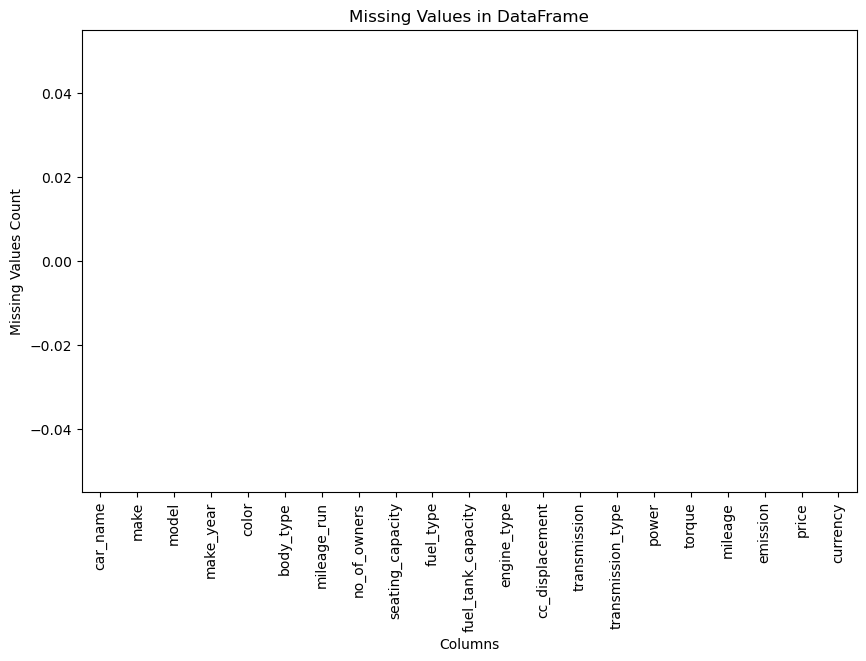

In [10]:
"""Check missing values using sns.barplot to visualize missing values in each column"""
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

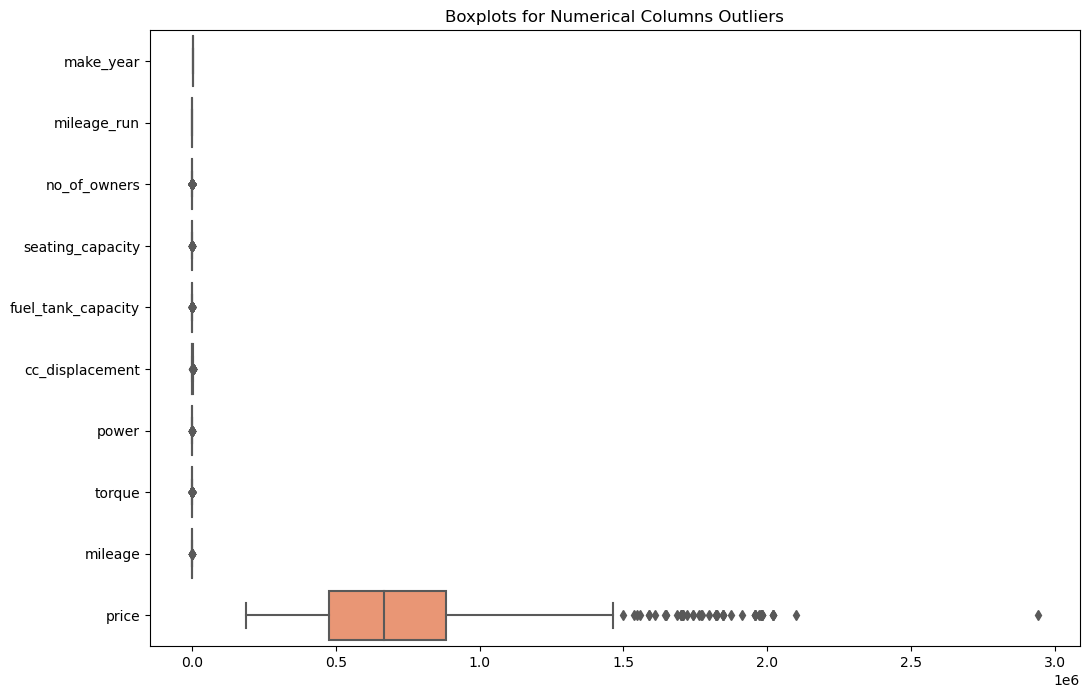

In [11]:
"""Outliers investigation"""
"""Visualizing outliers in numerical columns with boxplots"""
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title('Boxplots for Numerical Columns Outliers')
plt.show()


In [12]:
def winsorize(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_limit = df[column].quantile(lower_quantile)
    upper_limit = df[column].quantile(upper_quantile)
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

"""Applying winsorization to remove outliers by converting them into less extreme values.
Clip method limits the values in the 'price' to lower and upper limits. 
Values below the 5th and above 95th percentiles are replaced by the 5th/95th percentile values accordingly. 
This does not remove the values, rather caps them at certain points. """
df = winsorize(df, 'price', lower_quantile=0.05, upper_quantile=0.95)

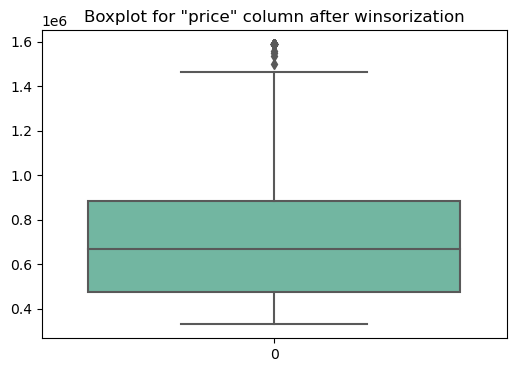

In [13]:
"""Check for outliers again after winsorization."""
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['price'], orient='v', palette='Set2')
plt.title('Boxplot for "price" column after winsorization')
plt.show()

# Normalization

## Normalization - 1NF
- Each column should contain atomic/single values
- no multiple values / no duplicate rows

In [14]:
"""Checking and dropping duplicate rows. """
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 62


In [15]:
df = df.drop_duplicates()

## Normalization - 2NF

### Creating Primary and Foreign keys before splitting into smaller DFs

In [16]:
def generate_primary_key(df, pk_columns, id_field):
    """"
    Generate primary keys from specified pk_columns in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame to which primary keys are added.
        pk_columns (list): List of column names from which primary keys are generated.
        id_field (str): The name of the new primary key column.

    Returns:
        pandas.DataFrame: The DataFrame with primary key columns added.
    
    Description:
        The function generates primary keys for the DataFrame based on the specified 'pk_columns'.
        It uses the 'pd.factorize()' function to convert categorical data into numerical codes.
        The function creates unique integer identifiers for each combination of values in the selected 'pk_columns'.
        The primary key values start from 1 and increment by 1 for each unique combination of values.
        The new primary key column is added to the DataFrame with the name specified by 'id_field'.
    """
    df[id_field] = pd.factorize(df[pk_columns].apply(tuple, axis=1))[0] + 1
    return df

In [17]:
"""Selecting columns for primary and foreign key creation."""
car_type_pk = ['car_name', 'make', 'model']
car_specifications_pk = ['fuel_type', 'fuel_tank_capacity', 'engine_type', 'cc_displacement', 'transmission', 
                         'transmission_type', 'power', 'torque', 'mileage', 'emission']
car_condition_pk = ['mileage_run', 'no_of_owners', 'color']
car_size_pk = ['body_type', 'seating_capacity']

In [18]:
df = generate_primary_key(df, car_type_pk, "car_id")
df = generate_primary_key(df, car_specifications_pk, "specifications_id")
df = generate_primary_key(df, car_condition_pk, "condition_id")
df = generate_primary_key(df, car_size_pk, "size_id")

In [19]:
"""Seeing if the columns are created."""
df.columns

Index(['car_name', 'make', 'model', 'make_year', 'color', 'body_type',
       'mileage_run', 'no_of_owners', 'seating_capacity', 'fuel_type',
       'fuel_tank_capacity', 'engine_type', 'cc_displacement', 'transmission',
       'transmission_type', 'power', 'torque', 'mileage', 'emission', 'price',
       'currency', 'car_id', 'specifications_id', 'condition_id', 'size_id'],
      dtype='object')

In [20]:
"""Inspecting how the rows look for last entries."""
df[['car_name','car_id','specifications_id','condition_id','size_id']].tail(20)

,car_name,car_id,specifications_id,condition_id,size_id
958,Hyundai Verna [2017-2020] 1.6 VTVT SX,27,27,864,1
959,Hyundai Verna [2017-2020] 1.6 VTVT SX,27,27,865,1
960,Maruti Suzuki Vitara Brezza [2018-2020] ZDI PL...,146,319,866,3
961,Honda Jazz [2015-2020] S AT,371,323,867,4
962,Maruti Suzuki Vitara Brezza [2016-2020] VDi,372,319,868,3
963,Maruti Suzuki Swift [2017-2021] ZXi AMT,145,322,869,4
964,Maruti Suzuki Swift [2017-2021] ZXi Plus,368,322,870,4
965,Renault Captur [2017-2020] RXT Dual Tone,373,324,871,3
966,Renault Captur [2017-2020] RXT Dual Tone,373,324,872,3
967,Maruti Suzuki Ignis [2017-2020] Zeta AMT Petrol,40,320,873,4


## Creating Tables in 2NF
Split the DataFrame into smaller DataFrames based on related attributes, keep PK & FK, and deduplicate. 

In [21]:
"""Listing out attributes that need to be included into DFs."""
car_listing_cols = ['car_id', 'specifications_id', 'condition_id', 'size_id', 'make_year', 'price', 'currency']
car_type_cols = ['car_id'] + car_type_pk
car_specifications_cols = ['specifications_id'] + car_specifications_pk
car_condition_cols = ['condition_id'] + car_condition_pk
car_size_cols = ['size_id'] + car_size_pk

In [22]:
def deduplicate(df, cols):
    """
    Filter out duplicate rows based on specified columns.

    Parameters:
        df (pandas.DataFrame): The DataFrame to filter.
        cols (list): List of column names to use for identifying duplicates.

    Returns:
        pandas.DataFrame: The DataFrame with duplicate rows removed.
    """
    df = df[cols].drop_duplicates()
    return df

In [23]:
"""DFs for uploading data. """
car_listing = deduplicate(df, car_listing_cols)
car_type = deduplicate(df, car_type_cols)
car_specifications = deduplicate(df, car_specifications_cols)
car_condition = deduplicate(df, car_condition_cols)
car_size = deduplicate(df, car_size_cols)

# Uploading data directly to MySQL

In [24]:
"""MySQL database connection details from db_config"""
username = db_config.username
password = db_config.password
host = db_config.host
port = db_config.port
database = db_config.database

In [25]:
"""Create the MySQL engine"""
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

In [26]:
"""Table schemas. """
car_size_schema = ("""
        CREATE TABLE car_size (
            size_id INT PRIMARY KEY AUTO_INCREMENT,
            body_type VARCHAR(100) NOT NULL,
            seating_capacity INT NOT NULL
        )
    """)

car_specifications_schema = ("""
CREATE TABLE car_specifications (
    specifications_id INT PRIMARY KEY AUTO_INCREMENT,
    fuel_type VARCHAR(100) NOT NULL,
    fuel_tank_capacity INT NOT NULL,
    engine_type VARCHAR(200) NOT NULL,
    cc_displacement INT,
    transmission VARCHAR(100) NOT NULL,
    transmission_type VARCHAR(100) NOT NULL,
    power FLOAT,
    torque FLOAT,
    mileage FLOAT,
    emission VARCHAR(100) NOT NULL
)
""")

car_condition_schema = ("""
CREATE TABLE car_condition (
    condition_id INT PRIMARY KEY AUTO_INCREMENT,
    mileage_run FLOAT,
    no_of_owners INT,
    color VARCHAR(100) NOT NULL
)
""")

car_type_schema = ("""
CREATE TABLE car_type (
    car_id INT PRIMARY KEY AUTO_INCREMENT,
    car_name VARCHAR(200) NOT NULL,
    make VARCHAR(100) NOT NULL,
    model VARCHAR(100) NOT NULL
)
""")


car_listing_schema = ("""
CREATE TABLE car_listing (
    listing_id INT PRIMARY KEY AUTO_INCREMENT,
    car_id INT NOT NULL,
    specifications_id INT NOT NULL,
    condition_id INT NOT NULL,
    size_id INT NOT NULL,
    make_year YEAR NOT NULL,
    price INT NOT NULL,
    currency VARCHAR(10) NOT NULL,
    FOREIGN KEY (car_id) REFERENCES car_type(car_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (specifications_id) REFERENCES car_specifications(specifications_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (condition_id) REFERENCES car_condition(condition_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (size_id) REFERENCES car_size(size_id) ON DELETE CASCADE ON UPDATE CASCADE
)
""")

In [27]:
def df_to_mysql(df, table_schema, table_name):
    """
    Upload a DataFrame to a MySQL database table.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame to be uploaded.
        table_name (str): The name of the table to upload the DataFrame.
        engine (sqlalchemy.engine.Engine): The MySQL database engine.

    Returns:
        None
    """
    with engine.connect() as con:
        con.execute(table_schema)
        
    print(f"Schema created successfully!")
    df.to_sql(name=table_name, con=engine, if_exists='append', index=False)
    print(f"Data uploaded to MySQL table '{table_name}' successfully!")

In [28]:
"""List of table names and table schemas"""
df_names = [car_size, car_specifications, car_condition, car_type, car_listing]
table_names = ["car_size", "car_specifications", "car_condition", "car_type", "car_listing"]
table_schemas = [car_size_schema, car_specifications_schema, car_condition_schema, car_type_schema, car_listing_schema]

In [29]:
"""Creating schemas and uploading data from dataframes directly to MySQL database."""
for i in range(len(table_names)):
    table_name = table_names[i]
    table_schema = table_schemas[i]
    df = df_names[i]
    df_to_mysql(df, table_schema, table_name)

Schema created successfully!
Data uploaded to MySQL table 'car_size' successfully!
Schema created successfully!
Data uploaded to MySQL table 'car_specifications' successfully!
Schema created successfully!
Data uploaded to MySQL table 'car_condition' successfully!
Schema created successfully!
Data uploaded to MySQL table 'car_type' successfully!
Schema created successfully!
Data uploaded to MySQL table 'car_listing' successfully!


/var/folders/_t/81hplzs570d_45ldwbxvmx4w0000gp/T/ipykernel_61094/1258011208.py:14: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  con.execute(table_schema)


# Importing data from MySQL DB to Pandas DF

In [31]:
"""Query to execute on DB. """
query = "SELECT * FROM car_listing"

"""Load from MySQL DB to df2"""
df2 = pd.read_sql(query, con=engine)
df2

,listing_id,car_id,specifications_id,condition_id,size_id,make_year,price,currency
0,1,1,1,1,1,2017,657000,INR
1,2,2,2,2,2,2016,682000,INR
2,3,3,3,3,3,2019,793000,INR
3,4,4,4,4,4,2017,414000,INR
4,5,5,5,5,4,2017,515000,INR
...,...,...,...,...,...,...,...,...
911,912,27,27,879,1,2018,956000,INR
912,913,27,27,880,1,2019,1027000,INR
913,914,375,326,881,1,2014,736000,INR
914,915,376,327,882,2,2020,749000,INR
